<a href="https://colab.research.google.com/github/leninvarma11/Homework-1-Lenin-Varma-Nallapu-700076011/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Question
1. Meaning of Each Term

P(c): prior class probability.

P(d∣c): likelihood of the document given the class.

P(c∣d): posterior probability (what we want).

2. Why Can We IgnoreP(d)?

P(d) is ignored because it is constant across classes.

#2 Question

Class priors:
𝑃(−)=3/5

P(+)=2/5 (not needed for this Q, but good context).

Vocabulary size:
∣V∣=20.

Negative class:

Total token count = 14.

Word “predictable” occurs 2 times.

Word “fun” occurs 0 times.

* Formula for likelihood with add-1 smoothing:

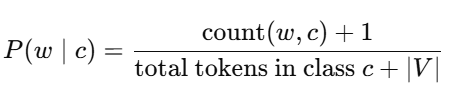

Task 1. Denominator for likelihood estimation (Negative class)

Denominator=14+20=34

Task 2. P(predictable∣−)

P(predictable∣−)=2+1/14+20= 3/34

Task 3.P(fun∣−)

P(fun∣−)=0+1/14+20=1/34


#3 Question
**Negative class**
score(−) = (3/5) * (3/34) * (2/34) * (1/34)
= 9/98260 ≈ 9.16 × 10^(-5)

Prior for negative is 3/5. The smoothed word probabilities for “predictable,” “no,” and “fun” are 3/34, 2/34, and 1/34. Multiplying gives 9/98260.

**Positive class**
score(+) = (2/5) * (1/30) * (1/30) * (1/30)
= 1/67500 ≈ 1.48 × 10^(-5)

Prior for positive is 2/5. Since none of the words appear in the positive class, each gets probability 1/30 after smoothing. Multiplying gives 1/67500.

**Decision**
The negative score (≈ 9.16 × 10^(-5)) is larger than the positive score (≈ 1.48 × 10^(-5)), so the document is classified as **Negative (−)**.


#4 Question
**1. Representational Harm**

* When a system reinforces stereotypes or unfair portrayals.
* Kiritchenko & Mohammad (2018): classifiers labeled neutral text about minority groups as more negative  misrepresents those groups.

**2. Risk of Censorship**

* Toxicity classifiers may over-flag reclaimed slurs or discussions by marginalized groups.
* Risk = silencing important conversations instead of reducing real harm.

**3. Performance on AAE / Indian English**

* Training data skews toward Standard English.
* Less exposure → misinterpret words/grammar → worse accuracy on AAE/Indian English.


#5 Question

#Confusion Matrix

| System \ Gold           | Cat | Dog | Rabbit | Row Total (Predicted) |
| ----------------------- | --- | --- | ------ | --------------------- |
| **Cat**                 | 5   | 10  | 5      | 20                    |
| **Dog**                 | 15  | 20  | 10     | 45                    |
| **Rabbit**              | 0   | 15  | 10     | 25                    |
| **Column Total (Gold)** | 20  | 45  | 25     | 90                    |

#1.Per-Class Precision & Recall

Precision(class) = TP / (TP + FP)

Recall(class) = TP / (TP + FN)

#Cat

TP = 5

FP = 15 (from Dog) + 0 (from Rabbit) = 15

FN = 10 (Dog misclassified as Cat) + 5 (Rabbit misclassified as Cat) = 15

Precision(Cat) = 5 / (5 + 15) = 0.25

Recall(Cat) = 5 / (5 + 15) = 0.25

#Dog

TP = 20

FP = 10 (Cat) + 15 (Rabbit) = 25

FN = 15 (Cat misclassified as Dog) + 10 (Rabbit misclassified as Dog) = 25

Precision(Dog) = 20 / (20 + 25) = 0.444

Recall(Dog) = 20 / (20 + 25) = 0.444

#Rabbit

TP = 10

FP = 5 (Cat) + 10 (Dog) = 15

FN = 5 (Cat misclassified as Rabbit) + 15 (Dog misclassified as Rabbit) = 20

Precision(Rabbit) = 10 / (10 + 15) = 0.40

Recall(Rabbit) = 10 / (10 + 20) = 0.40

#2 Macro vs. Micro Averaging
Macro-Averaged

Precision_macro = (0.25 + 0.444 + 0.40) / 3 = 0.365

Recall_macro = (0.25 + 0.444 + 0.40) / 3 = 0.365

Micro-Averaged

Micro treats all predictions equally (global counts).

Total TP = 5 + 20 + 10 = 35

Total FP = 15 + 25 + 15 = 55

Total FN = 15 + 25 + 20 = 60

Precision_micro = TP / (TP + FP) = 35 / (35 + 55) = 35 / 90 = 0.389

Recall_micro = TP / (TP + FN) = 35 / (35 + 60) = 35 / 95 = 0.368
#Interpretation

Macro averaging → treats all classes equally, even if imbalanced. (Good when you care about minority classes).

Micro averaging → weights results by class frequency (good when overall accuracy across all samples matters)

In [ ]:
#3 Python Implementation

import numpy as np

# Confusion matrix
# Rows = predicted, Cols = actual
confusion = np.array([
    [5, 10, 5],   # Cat
    [15, 20, 10], # Dog
    [0, 15, 10]   # Rabbit
])

# Per-class precision & recall
num_classes = confusion.shape[0]
precisions = []
recalls = []

for i in range(num_classes):
    TP = confusion[i, i]
    FP = confusion[i, :].sum() - TP
    FN = confusion[:, i].sum() - TP

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    precisions.append(precision)
    recalls.append(recall)
    print(f"Class {i} -> Precision: {precision:.3f}, Recall: {recall:.3f}")

# Macro averages
macro_precision = np.mean(precisions)
macro_recall = np.mean(recalls)

# Micro averages
TP_total = np.trace(confusion)
FP_total = confusion.sum(axis=1).sum() - TP_total
FN_total = confusion.sum(axis=0).sum() - TP_total

micro_precision = TP_total / (TP_total + FP_total)
micro_recall = TP_total / (TP_total + FN_total)

print("\nMacro Precision:", round(macro_precision, 3))
print("Macro Recall:", round(macro_recall, 3))
print("Micro Precision:", round(micro_precision, 3))
print("Micro Recall:", round(micro_recall, 3))


Class 0 -> Precision: 0.250, Recall: 0.250
Class 1 -> Precision: 0.444, Recall: 0.444
Class 2 -> Precision: 0.400, Recall: 0.400

Macro Precision: 0.365
Macro Recall: 0.365
Micro Precision: 0.389
Micro Recall: 0.389


#6 question

#1. Bigram Sentence Probabilities (MLE)
* Formula:
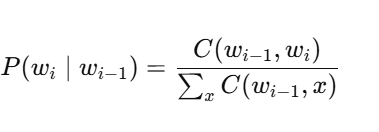

* Sentence S1:
<s I love NLP /s>

P(I | <s) = 2 / (2+1) = 2/3

P(love | I) = 2 / 2 = 1

P(NLP | love) = 1 / (1+1) = 1/2

P(/s> | NLP) = 1 / 1 = 1

P(S1)=(2/3)×(1)×(1/2)×(1)=1/3=0.333

* Sentence S2:
<s I love deep learning /s>

P(I | <s) = 2/3

P(love | I) = 1

P(deep | love) = 1 / (1+1) = 1/2

P(learning | deep) = 2 / 2 = 1

P(/s> | learning) = 1 / (1+1) = 1/2

P(S2)=(2/3)×(1)×(1/2)×(1)×(1/2)=1/6=0.167

* Which is more probable?

P(S1) = 0.333

P(S2) = 0.167
→ S1 is more probable under the bigram model.

# 2.Zero-Probability Problem
* (a) Probability of “noodle” after “ate” with MLE

Total after “ate” = 12

Count(ate, noodle) = 0

P(noodle∣ate)=0/12=0

* (b) Why is this a problem?

Any sentence containing “ate noodle” has probability 0, no matter what comes next.

This makes perplexity undefined (log(0) → −∞).

The model cannot handle unseen but reasonable words.

* (c) With Add-1 (Laplace smoothing)
* Formulae:
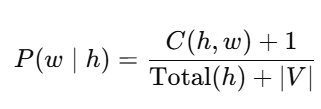

Count(ate, noodle) = 0 → 0+1

Total(ate) = 12

Vocabulary size |V| = 10

P(noodle∣ate)= 0+1/12+10=1/22=0.045

#7 Question
#1) P(cats ∣ I, like)

P(cats ∣ I, like) = Count(I like cats) / Count(I like) = 1 / 2 = 0.5

#2) P(dogs ∣ You, like) (trigram → bigram backoff)

* Trigram Count(You like dogs) = 0 → backoff to bigram
* P(dogs ∣ like) = Count(like dogs) / (Count(like cats) + Count(like dogs)) = 1 / (2+1) = 1/3 ≈ 0.333

#3) Why backoff
* Because some trigrams (e.g. You like dogs) never occur, MLE gives 0.
* Backoff uses lower-order (bigram/unigram) counts to avoid zero probabilities and handle data sparsity.



In [ ]:
#8 Question

from collections import defaultdict
import math

# Training corpus
corpus = [
    "<s> I love NLP </s>",
    "<s> I love deep learning </s>",
    "<s> deep learning is fun </s>"
]
# 1. Preprocess corpus into tokens
tokenized_corpus = [sentence.split() for sentence in corpus]
# 2. Compute unigram and bigram counts
unigram_counts = defaultdict(int)
bigram_counts = defaultdict(int)

for sentence in tokenized_corpus:
    for i, word in enumerate(sentence):
        unigram_counts[word] += 1
        if i < len(sentence) - 1:
            bigram = (word, sentence[i+1])
            bigram_counts[bigram] += 1
# 3. Estimate bigram probabilities using MLE
# P(w2 | w1) = count(w1, w2) / count(w1)
bigram_probs = {}
for (w1, w2), count in bigram_counts.items():
    bigram_probs[(w1, w2)] = count / unigram_counts[w1]
# 4. Function to calculate probability of a sentence
def sentence_probability(sentence_tokens):
    prob = 1.0
    for i in range(len(sentence_tokens)-1):
        w1, w2 = sentence_tokens[i], sentence_tokens[i+1]
        if (w1, w2) in bigram_probs:
            prob *= bigram_probs[(w1, w2)]
        else:
            prob *= 0.0  # unseen bigram
    return prob
# 5. Test sentences
s1 = "<s> I love NLP </s>".split()
s2 = "<s> I love deep learning </s>".split()

p1 = sentence_probability(s1)
p2 = sentence_probability(s2)

print("Sentence 1:", " ".join(s1), "Probability =", p1)
print("Sentence 2:", " ".join(s2), "Probability =", p2)
# 6. Which sentence does the model prefer?
if p1 > p2:
    print("\nModel prefers Sentence 1 because it has higher probability.")
elif p2 > p1:
    print("\nModel prefers Sentence 2 because it has higher probability.")
else:
    print("\nModel is indifferent (equal probability).")


Sentence 1: <s> I love NLP </s> Probability = 0.3333333333333333
Sentence 2: <s> I love deep learning </s> Probability = 0.16666666666666666

Model prefers Sentence 1 because it has higher probability.
